In [1]:
import pandas as pd
import numpy as np

training_df = pd.read_csv('Titanic/train.csv', header=0)

In [2]:
training_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### For the missing values in "Age" and "Embarked", lets fill the median values

In [4]:
training_df["Age"] = training_df["Age"].fillna(training_df["Age"].median())
training_df["Embarked"] = training_df["Embarked"].fillna("S")

In [5]:
### Transforming some data to ordinal symbols for our classifier

training_df.loc[training_df["Sex"] == "male", "Sex"] = 0
training_df.loc[training_df["Sex"] == "female", "Sex"] = 1

training_df.loc[training_df["Embarked"] == "S", "Embarked"] = 0
training_df.loc[training_df["Embarked"] == "C", "Embarked"] = 1
training_df.loc[training_df["Embarked"] == "Q", "Embarked"] = 2

## Lets use Linear Regression to check : 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn import cross_validation

predictors =  ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
alg = LinearRegression()

kf = KFold(training_df.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_predictors = (training_df[predictors].iloc[train,:])
    train_target = training_df["Survived"].iloc[train]
    alg.fit(train_predictors, train_target)
    
    test_predictions = alg.predict(training_df[predictors].iloc[test,:])
    predictions.append(test_predictions)

#since predictions are in 3 (from n-folds) separate arrays (combine them)
predictions = np.concatenate(predictions, axis=0)

#map predictions to outcomes (>.5 survives(1), <= .5 (dies))
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

#then we check and compare the accuracy
accuracy = sum(predictions[predictions == training_df["Survived"]]) / len(predictions)

print (accuracy)

0.783389450056


C:\Users\Lohith\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lohith\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


### 78 % accuracy if Linear Regression is used.


## Using Cross validation and Logistic Regression to predict: 


In [7]:
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

titanic_test = pandas.read_csv("Titanic/train.csv")

titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].median())
titanic_test.loc[titanic_test['Sex'] == 'male', 'Sex'] = 0
titanic_test.loc[titanic_test['Sex'] == 'female', 'Sex'] = 1

titanic_test['Embarked'] = titanic_test['Embarked'].fillna('S')
titanic_test.loc[titanic_test['Embarked']=='S', 'Embarked'] = 0
titanic_test.loc[titanic_test['Embarked']=='C', 'Embarked'] = 1
titanic_test.loc[titanic_test['Embarked']=='Q', 'Embarked'] = 2

titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())

alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, titanic_test[predictors], titanic_test["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.787878787879


## More or less the same accuracy


### However, we can improve this by using a Random Forest classifier, which is a better algorithm for the non-linear tendencies/relationships in our dataset. Simply put, the random forest algorithm involves creating decision trees that have slightly randomized input data and splitpoint, and evaluating the overall average prediction of the trees.

### We can use the RandomForestClassifier implementation.

In [8]:
import pandas
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
titanic = pandas.read_csv("Titanic/train.csv")
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked']=='S', 'Embarked'] = 0
titanic.loc[titanic['Embarked']=='C', 'Embarked'] = 1
titanic.loc[titanic['Embarked']=='Q', 'Embarked'] = 2

titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())
# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)
print(scores.mean())

0.801346801347


In [9]:
## we can tweak the parameters to minimize overfitting.

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=4, min_samples_leaf=2)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)
print(scores.mean())

0.820426487093


By changing the sample size to 150, splits to 4 and leafs to 2, we've increased the accuracy score to around 2 percent. However, we still have other columns in the data that we can test to increase the overall accuracy of our algorithm.

One of those is testing whether the name could be a factor (as unlikely as it sounds). This is done through feature engineering, namely, by creating a new feature, by identifying key information in the data which can help us increase the accuracy of our predictions.
In this case, our data includes the titles of the passengers. We can thus, generate a new feature by extracting their titles and including it in our predictors.

Let's add a few features that could help us.

In [10]:
# Add Features FamilySize, because more people can support each other to survive
# Create total count (SiblingSpouse + ParentChild)
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# Add Name Length because the longer the name, the more important sounding the invidual might be
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

In [11]:
## A function to get the title from a name.

import re

def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pandas.value_counts(titles))

# Add in the title column.
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Sir           1
Capt          1
Countess      1
Ms            1
Don           1
Lady          1
Jonkheer      1
Mme           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [12]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,23,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,51,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,44,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,24,1
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2,0,16,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0,23,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,4,30,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,2,49,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1,1,35,3


### Since we've extracted the title from the names, we can group the families together. Of course, the more members of the family there are, the more likely it is that they'll help each other to survive.

In [13]:
import operator

# A dictionary mapping family name to id
family_id_mapping = {}

# A function to get the id given a row
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family id
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = titanic.apply(get_family_id, axis=1)

# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
family_ids[titanic["FamilySize"] < 3] = -1

# Print the count of each unique id.
print(pandas.value_counts(family_ids))

titanic["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
## SelectKBest function, that helps us select the best features from the data

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

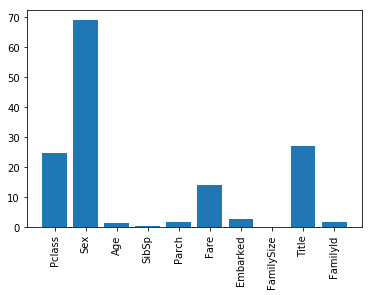

0.811447811448


In [15]:
# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# Pick only the four best features.
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)

scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)
print(scores.mean())

## The feature that correlates to survivability is Sex, Passenger Class, Title and Fare


Aside from feature selection, we can also use Gradient Boosting on our classifier, which involves training decision trees one after another to recognize the errors of the trees before it.

And of course, we can use different classifiers to generate predictions which we can combine to have a more realistic approximation. While similar classifiers like a random forests and a decision tree might not work well because of their similarity, combining it with a linear regression works well.

Next, using a gradient boosting classifier and linear regression to estimate prediction accuracy.

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

0.819304152637


C:\Users\Lohith\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


## Now lets summarise things: 

In [17]:
# LOAD TRAINING AND TEST DATA  --------------------------------

training_df = pd.read_csv("Titanic/train.csv")
testing_df = pd.read_csv("Titanic/test.csv")

# CLEAN UP / FIX DATA  --------------------------------

training_df["Age"] = training_df["Age"].fillna(training_df["Age"].median())
training_df["Fare"] = training_df["Fare"].fillna(training_df["Fare"].median())
training_df["Embarked"] = training_df["Embarked"].fillna("S")

training_df.loc[training_df["Sex"] == "male", "Sex"] = 0
training_df.loc[training_df["Sex"] == "female", "Sex"] = 1
training_df.loc[training_df["Embarked"] == "S", "Embarked"] = 0
training_df.loc[training_df["Embarked"] == "C", "Embarked"] = 1
training_df.loc[training_df["Embarked"] == "Q", "Embarked"] = 2

testing_df["Age"] = testing_df["Age"].fillna(testing_df["Age"].median())
testing_df["Fare"] = testing_df["Fare"].fillna(testing_df["Fare"].median())
testing_df["Embarked"] = testing_df["Embarked"].fillna("S")

testing_df.loc[testing_df["Sex"] == "male", "Sex"] = 0
testing_df.loc[testing_df["Sex"] == "female", "Sex"] = 1
testing_df.loc[testing_df["Embarked"] == "S", "Embarked"] = 0
testing_df.loc[testing_df["Embarked"] == "C", "Embarked"] = 1
testing_df.loc[testing_df["Embarked"] == "Q", "Embarked"] = 2

# FEATURE FUNCTIONS / VARIABLES  --------------------------------

training_df["FamilySize"] = training_df["SibSp"] + training_df["Parch"]
training_df["NameLength"] = training_df["Name"].apply(lambda x: len(x))

testing_df["FamilySize"] = testing_df["SibSp"] + testing_df["Parch"]
testing_df["NameLength"] = testing_df["Name"].apply(lambda x: len(x))

title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Dr": 5,
    "Rev": 6,
    "Major": 7,
    "Col": 7,
    "Mlle": 8,
    "Mme": 8,
    "Don": 9,
    "Lady": 10,
    "Countess": 10,
    "Jonkheer": 10,
    "Sir": 9,
    "Capt": 7,
    "Ms": 2,
    "Dona": 10
}

# extract title from passengers name
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

family_id_mapping = {}

# extract last name and assign / add family id 
def get_family_id(row):
    # find last name 
    last_name = row["Name"].split(",")[0]
    # create family id
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the max id from the mapping and add one if
            # we don't have an id
            current_id = (max(family_id_mapping.items(), 
                key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]


# APPLY FEATURES   --------------------------------

training_titles = training_df["Name"].apply(get_title)
testing_titles = testing_df["Name"].apply(get_title)

for k, v in title_mapping.items():
    training_titles[training_titles == k] = v
    testing_titles[testing_titles == k] = v

training_df["Title"] = training_titles
testing_df["Title"] = testing_titles


# Get the family ids with the apply method
family_ids = training_df.apply(get_family_id, axis=1)
test_family_ids = testing_df.apply(get_family_id, axis=1)

# Categorize familysize < 3 into one
family_ids[training_df["FamilySize"] < 3] = -1
test_family_ids[testing_df["FamilySize"] < 3] = -1

training_df["FamilyId"] = family_ids
testing_df["FamilyId"] = test_family_ids
print (training_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

# Applying MP Algorithms to the test data

In [18]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), predictors]
]

full_predictions = []
td_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(training_df[predictors], training_df["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(testing_df[predictors].astype(float))[:,1]
    training_data_prediction = alg.predict_proba(training_df[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    td_predictions.append(training_data_prediction)

# The gradient boosting classifier generates better predictions, so we weight it higher.
full_predictions = (full_predictions[full_predictions==0] * 3 + full_predictions[full_predictions==1]) / 4
full_predictions[full_predictions <= .5] = 0
full_predictions[full_predictions > .5] = 1

td_predictions = (td_predictions[td_predictions==0] * 3 + td_predictions[td_predictions==1]) / 4
td_predictions[td_predictions <= .5] = 0
td_predictions[td_predictions > .5] = 1

full_predictions = full_predictions.astype(int)

accuracy = sum(td_predictions[td_predictions == training_df["Survived"]]) / len(td_predictions)
print (accuracy)

0.851851851852


C:\Users\Lohith\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


# Code block to generate submission file to kaggle

In [21]:
submission = pd.DataFrame({
    "PassengerId": testing_df["PassengerId"],
    "Survived": full_predictions
   })

submission.to_csv("Titanic/kaggle-titanic-2017-05-22.csv", index=False)